<h2 style='color:purple' align='center'>Diabetes Prediction</h2> 
<br>


###  1. Importing Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

### 2. Importing Dataset

In [91]:
diabetes_df = pd.read_csv("diabetes.csv")

In [92]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
diabetes_df.shape

(768, 9)

In [94]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<br>

### 3. Data Cleaning

In [95]:
# diabetes_Xtrain_df[diabetes_df["SkinThickness"] == 0]

In [96]:
# diabetes_Xtrain_df[diabetes_df["Insulin"] == 0]

In [97]:
# diabetes_Xtrain_df[diabetes_df["BMI"] == 0]

In [98]:
# diabetes_Xtrain_df[diabetes_df["Glucose"] == 0]

In [99]:
allColumns = list(diabetes_df.columns)
allColumns.remove("Outcome")

print(allColumns)

for column in allColumns:
     diabetes_df[column]  = diabetes_df[column].replace(0, np.mean(diabetes_df[column]) )

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


<br>

### 4. Data Exploration and visulisation

**Bar Plots**

- Let's see how many people in dataset are diabetic and how many are not

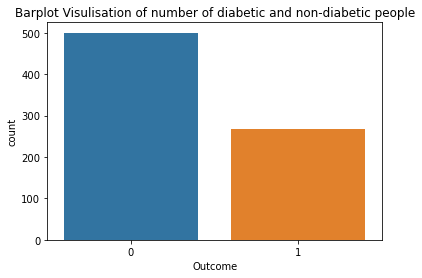

In [100]:
sns.countplot(x= "Outcome", data=diabetes_df)
plt.title("Barplot Visulisation of number of diabetic and non-diabetic people")
plt.show()

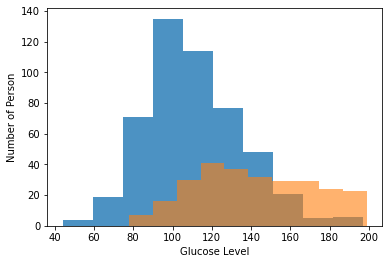

In [101]:
plt.hist(diabetes_df[diabetes_df['Outcome'] == 0]["Glucose"], alpha=0.8, label="Non-Diabetic")
plt.hist(diabetes_df[diabetes_df['Outcome'] == 1]["Glucose"], alpha=0.6, label="Diabetic")
plt.xlabel("Glucose Level")
plt.ylabel("Number of Person")
plt.show()

<br>

### 5. Performing Data Normalization

In [102]:
diabetes_df.head(n = 5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [103]:
X = np.asarray(diabetes_df.drop(["Outcome"], axis=1))
Y = np.asarray(diabetes_df['Outcome'])

In [104]:
print(X)
# print(X_test.shape)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [105]:
from sklearn import preprocessing

X = preprocessing.normalize(X)

<br>

### 6. Train and Test Data

**Splitting Data into training and testing**

In [106]:
split = int(0.7 * X.shape[0])

print(split)

X_train = X[ : split]
Y_train = Y[ : split]
X_test = X[split: ]
Y_test = Y[split: ]

print(X_train.shape , Y_train.shape)
print(X_test.shape, Y_test.shape)

537
(537, 8) (537,)
(231, 8) (231,)


**Using sklearn KNN algorithm for training and testing**

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
checkDiabetes = KNeighborsClassifier(n_neighbors=11)

In [109]:
checkDiabetes.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [110]:
# Accuracy on Train Data

checkDiabetes.score(X_train , Y_train)

0.7411545623836127

In [111]:
# Accuracy on Test Data

checkDiabetes.score(X_test , Y_test)

0.7186147186147186

Text(0.5, 1.0, 'knn_compare_model')

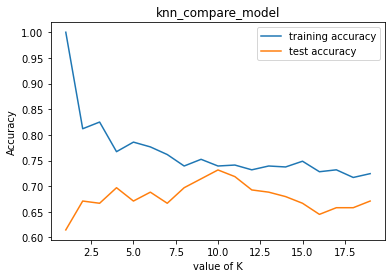

In [112]:
kValues = range(1, 20)
train_accuracy = []
test_accuracy = []

for neighbour in kValues:
    diabetesCheck = KNeighborsClassifier(n_neighbors=neighbour)
    diabetesCheck.fit(X_train, Y_train)
    
    train_accuracy.append( diabetesCheck.score(X_train , Y_train) )
    test_accuracy.append( diabetesCheck.score(X_test , Y_test) )   
    
plt.plot(kValues, train_accuracy, label="training accuracy")
plt.plot(kValues, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("value of K")
plt.legend()
plt.title("knn_compare_model")
# plt.savefig('knn_compare_model')

<br>

### 7. Saving the Model

In [113]:
import pickle

In [114]:
# Model Saving 

Pkl_Filename = "diabeteseModel.pkl"

with open(Pkl_Filename, 'wb') as file: 
    pickle.dump(checkDiabetes, file)

In [115]:
# Model loading

with open(Pkl_Filename, 'rb') as file:  
    diabetesLoadedModel = pickle.load(file)

In [116]:
loadedModelAccuracy = diabetesLoadedModel.score(X_test, Y_test)

In [117]:
print("Accuracy = ",loadedModelAccuracy * 100,"%")

Accuracy =  71.86147186147186 %
